In [2]:
#%%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
#%%
# PREPROCESSING
data = pd.read_parquet( os.getcwd() + f'\\data\\yellow_tripdata_2024-05.parquet')
data = data.query('PULocationID == 239')
data = data.sample(50000)
data.head()
data.to_csv('data.csv', index=False) 


In [3]:
#%%
data = pd.read_csv('data/data.csv')
data.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-05-10 12:48:26,2024-05-10 12:59:00,1.0,1.56,1.0,N,239,43,1,11.40,0.0,0.5,3.08,0.0,1.0,18.48,2.5,0.0
1,1,2024-05-16 18:34:45,2024-05-16 18:50:53,1.0,2.20,1.0,N,239,162,1,16.30,5.0,0.5,4.55,0.0,1.0,27.35,2.5,0.0
2,2,2024-05-23 10:24:32,2024-05-23 10:32:43,NaN,1.59,NaN,NaN,239,24,0,14.13,0.0,0.5,0.00,0.0,1.0,18.13,NaN,NaN
3,2,2024-05-10 14:31:00,2024-05-10 14:45:08,1.0,2.49,1.0,N,239,41,1,16.30,0.0,0.5,4.06,0.0,1.0,24.36,2.5,0.0
4,2,2024-05-02 18:01:40,2024-05-02 18:20:13,NaN,2.25,NaN,NaN,239,140,0,-1.31,0.0,0.5,0.00,0.0,1.0,2.69,NaN,NaN


In [4]:
# %%
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        43613 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             43613 non-null  float64
 6   store_and_fwd_flag     43613 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  int64  
 10  fare_amount            50000 non-null  float64
 11  extra                  50000 non-null  float64
 12  mta_tax                50000 non-null  float64
 13  tip_amount             50000 non-null  float64
 14  tolls_amount           50000 non-null  float64
 15  im

In [5]:
#%%
# Drop coloumns 
columns = ['tpep_pickup_datetime', 'total_amount', 'DOLocationID', 'trip_distance']
data = pd.DataFrame(data, columns=columns)
data.head()




,tpep_pickup_datetime,total_amount,DOLocationID,trip_distance
0,2024-05-10 12:48:26,18.48,43,1.56
1,2024-05-16 18:34:45,27.35,162,2.20
2,2024-05-23 10:24:32,18.13,24,1.59
3,2024-05-10 14:31:00,24.36,41,2.49
4,2024-05-02 18:01:40,2.69,140,2.25


In [6]:
# %%
# Check for Missing Value

(data.isna().mean()*100).sort_values(ascending=False).head(25)


tpep_pickup_datetime    0.0
total_amount            0.0
DOLocationID            0.0
trip_distance           0.0
dtype: float64

In [7]:
#%%
# Check for non numeric values
data.describe(exclude=np.number).T


,count,unique,top,freq
tpep_pickup_datetime,50000,49077,2024-05-06 08:02:25,3


In [ ]:
#%%
#Check for negative values

print('total_amount ', len(data[data.total_amount <=0]))
print('DOLocationID ', len(data[data.DOLocationID <= 0]))



In [8]:
#%%
#Get rows with total_amount>0
data = data[data['total_amount'] > 0]

data.info



<bound method DataFrame.info of       tpep_pickup_datetime  total_amount  DOLocationID  trip_distance
0      2024-05-10 12:48:26         18.48            43           1.56
1      2024-05-16 18:34:45         27.35           162           2.20
2      2024-05-23 10:24:32         18.13            24           1.59
3      2024-05-10 14:31:00         24.36            41           2.49
4      2024-05-02 18:01:40          2.69           140           2.25
...                    ...           ...           ...            ...
49995  2024-05-20 16:13:39         27.36           230           2.07
49996  2024-05-28 17:34:26         17.30           236           1.20
49997  2024-05-08 14:36:48         16.80            48           1.50
49998  2024-05-08 07:03:31         29.46           234           3.41
49999  2024-05-05 18:32:28         16.10           161           1.50

[49542 rows x 4 columns]>

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


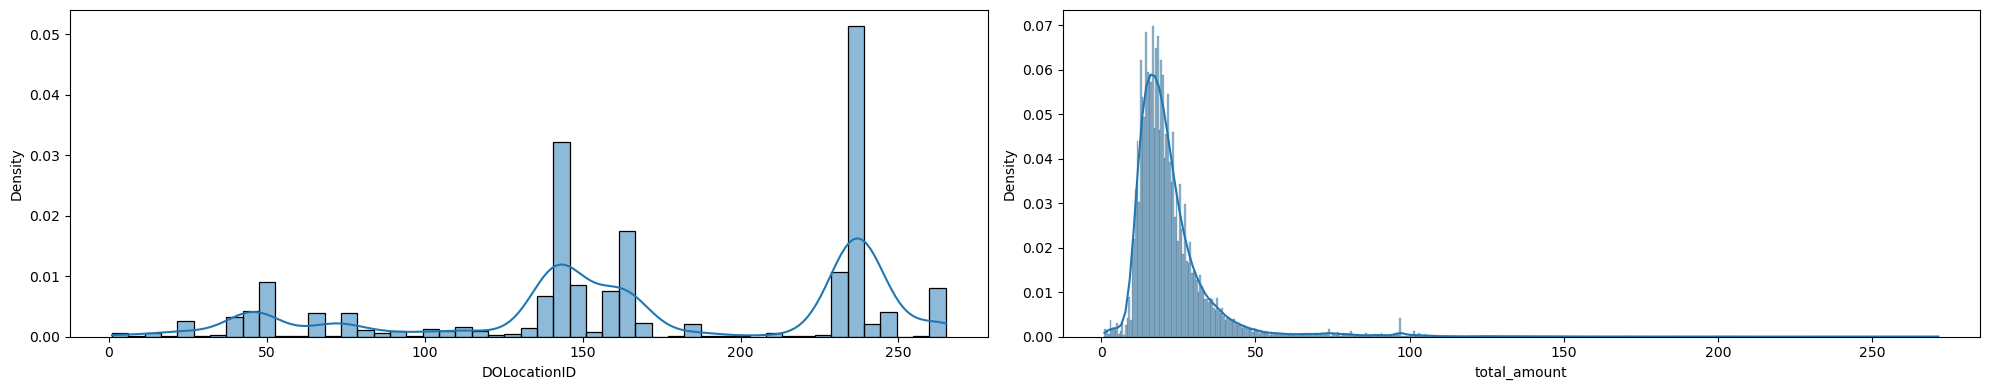

In [9]:
#%%
#Let's see some destiny
cols = ['DOLocationID', 'total_amount']

# create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20,4))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()


In [ ]:
#%%
#Add week dates 

data["weekDate"] = pd.to_datetime(data['tpep_pickup_datetime']).dt.dayofweek



In [ ]:
#%%
# Process data for next Fourier
#data['timestamp'] = pd.to_datetime(data['tpep_pickup_datetime'])

#data['N'] = 1
#data.drop(['tpep_pickup_datetime'], axis=1, inplace=True)

#data.head()



In [ ]:
# %%
# Save clean data

data.to_csv('data/clean_data.csv', index=False) 


In [ ]:
# %%
